In [375]:
import pandas as pd
from surprise import SVD, accuracy
from surprise import Reader, Dataset
from surprise import accuracy
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from konlpy.tag import Okt
import pandas as pd
import numpy as np
import re
from gensim.models import word2vec
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib
from surprise.dataset import DatasetAutoFolds
from sklearn.metrics import mean_squared_error

matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [376]:
csv0 = pd.read_csv('jobplanet_it.csv')
csv0

,Unnamed: 0,회사,직무,상황,지역,작성일,총점,승진 기회 및 가능성,복지 및 급여,업무와 삶의 균형,사내문화,경영진,총평,장점,단점,바라는점
0,0,페이레터(주),개발,\n 현직원\n,서울,2022. 11,40%,40%,40%,80%,80%,60%,\nBEST\n 부바부가 심하지만 나름 신입때는 배울게 많은 회사\n,최소한의 복지는 존재 중소기업보다는 좋은 회사. 수직적이지 않아서 좋습니다 남아있는...,부서가 잘못 걸리면 평생 쓰지 않을 언어를 쓰고 커리어에 도움이 되지 않습니다. 상...,기본 연봉을 올리지 않으면 남아있는 직원들마저 떠날 가능성이 높습니다. 최소한의 복...
1,1,페이레터(주),개발,\n 전직원\n,서울,2022. 10,40%,40%,40%,80%,60%,40%,\nBEST\n 신입 개발자가 첫 경력 쌓기엔 아주 좋은 곳 하지만 중간 ...,처음 입사하면 신입 교육과 프로젝트를 진행하며 이는 실 업무할 시 도움이 됨 연차 ...,팀바팀이지만 업무의 체계가 주먹구구식이다 복지 및 급여가 타 회사에 비해 약한 편 ...,상장에 열을 올리느라 정작 임직원들을 돌아보지 못하는 것 같아요 직원들의 의견에 더...
2,2,페이레터(주),개발,\n 전직원\n,서울,2022. 09,60%,60%,40%,60%,40%,40%,\nBEST\n 그당시 인턴기간이였지만 개발자 임에도 불구하고 정장을 입고...,자기분야를 개발하는데 지원을 조금 해줌 저녁식사 커피 머신기 여름에는 아이스크림 제공해줌,그당시 수직적인 문화이고 연봉도 만족할 수준은 아님 그리고 신입일때 정장을 입어야 했음,수직적인 분위기와 복장규제가 지금은 있는지는 모르겠지만 없어져야할 문화임
3,3,페이레터(주),개발,\n 전직원\n,서울,2022. 08,60%,60%,60%,60%,60%,60%,\nBEST\n 신입으로 다니기엔 좋다 연차쌓이면 고인물\n,신입으로 사회생활 처음 시작하기엔 괜찮음 사수 붙여주고 동기가 생겨 재밌따 3개월 ...,최근에 중견기업으로 바꼈다고 들음 중소기업 혜택이 쏠쏠했는데 아쉽,능력없는 고인물들은 정리를 했으면 좋겠다 분위기 악화시는 존재들
4,4,페이레터(주),개발,\n 현직원\n,서울,2022. 08,40%,100%,40%,60%,100%,40%,\nBEST\n 복지가 계속 줄고 있음많은 사람은 이직하여 나갔고 그 부담...,눈치는 안봄 사람들은 좀 너그러운 분위기놀 수 있는 한량 회사카페를 자주 갈 수 있음,업무 외 시간에 일 하는 것은 당연한 것이라는 분위기야근하면 좋아하고 고객사 응대는...,분위기 변화를 위하려 노력이 필요로 해 보입니다하지만 관심 없는거 알아요
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13235,13235,(주)집토스,영업/제휴,\n 전직원\n,서울,2022. 12,40%,20%,20%,20%,20%,20%,\nBEST\n 아이티 회사가 맞는지 잘 모르겠는 스타트업\n,배울 수 있어 좋다 교육 잘 받고 할 수 있음 업무 자유도 높은편,처우 젊은꼰대 주말일 연봉적음 능력없는 사람들 관리직,앞으로 잘 이끌어주세요 많은 믿고 하는 직원들이 많으니
13236,13236,(주)집토스,서비스/고객지원,\n 전직원\n,서울,2022. 12,40%,60%,60%,60%,20%,20%,\nBEST\n 장점은 처음 일을 시작하는 사람들은 배울 수 있음 영업직에...,연차 눈치 안보고 쓸 수 있음 영업 잘하면 터치하지 않는다,복지제도가 없다고 볼 수 있음 영업 잘하면 터치하지 않지만 은근 자질구레 보여주기식...,절이 싫으면 중이 떠나야하기에 떠났지만 뒤돌아보면 아쉬움이 많은 회사였습니다
13237,13237,(주)집토스,마케팅/시장조사,\n 전직원\n,서울,2022. 11,40%,60%,60%,60%,60%,20%,\nBEST\n 성공 이후 직원들에게 어떤 베네핏을 제공할지에 대한 명확한...,자유로움. 자유로움의 이유는 방향성이 없기 때문에 아무말 대잔치가 가능하다. 특히 ...,방향성이 없고 생존만을 외친다. 생존은 방향성이 있어야 한다. 이전의 USP를 버리...,이 회사를 처음 만들었을 때의 본인들이 생각했던 방향이 맞습니다. 지금 당장의 매출...
13238,13238,(주)집토스,전문직,\n 전직원\n,서울,2022. 11,40%,60%,80%,40%,20%,20%,\nBEST\n 신입이 기본을 배우고 나가기에 너무 좋은 회사\n,처음 부동산을 접할 때 기본급을 받으며 일을 할 수 있다. 지바지이지만 사람들끼리 ...,부동산 기업중 가장 좋지 않은 기업이미지를 가지고 있으며. 직원들 관리가 제대로 되...,직원 관리가 제대로 되었으면 좋겠습니다


In [377]:
csv0['총평'] = csv0['총평'].apply(lambda v: v.replace("\n","").replace("BEST",""))

In [378]:
csv0['총평']

0                          부바부가 심하지만 나름 신입때는 배울게 많은 회사    
1              신입 개발자가 첫 경력 쌓기엔 아주 좋은 곳 하지만 중간 대리급 이상의 ...
2              그당시 인턴기간이였지만 개발자 임에도 불구하고 정장을 입고다니는게 비효율...
3                               신입으로 다니기엔 좋다 연차쌓이면 고인물    
4              복지가 계속 줄고 있음많은 사람은 이직하여 나갔고 그 부담은 남아 있는 ...
                               ...                        
13235                          아이티 회사가 맞는지 잘 모르겠는 스타트업    
13236          장점은 처음 일을 시작하는 사람들은 배울 수 있음 영업직에서는 좋은 점이...
13237          성공 이후 직원들에게 어떤 베네핏을 제공할지에 대한 명확한 가이드가 없음...
13238                        신입이 기본을 배우고 나가기에 너무 좋은 회사    
13239              돈 벌고 싶으면 열정 갈아 넣어라 부동산 쌩 초짜들은 배우기좋음    
Name: 총평, Length: 13240, dtype: object

In [379]:
tokenizer = RegexpTokenizer('\w+')
tokens = csv0['총평'].apply( tokenizer.tokenize )
tokens

0                      [부바부가, 심하지만, 나름, 신입때는, 배울게, 많은, 회사]
1        [신입, 개발자가, 첫, 경력, 쌓기엔, 아주, 좋은, 곳, 하지만, 중간, 대리급...
2        [그당시, 인턴기간이였지만, 개발자, 임에도, 불구하고, 정장을, 입고다니는게, 비...
3                             [신입으로, 다니기엔, 좋다, 연차쌓이면, 고인물]
4        [복지가, 계속, 줄고, 있음많은, 사람은, 이직하여, 나갔고, 그, 부담은, 남아...
                               ...                        
13235                       [아이티, 회사가, 맞는지, 잘, 모르겠는, 스타트업]
13236    [장점은, 처음, 일을, 시작하는, 사람들은, 배울, 수, 있음, 영업직에서는, 좋...
13237    [성공, 이후, 직원들에게, 어떤, 베네핏을, 제공할지에, 대한, 명확한, 가이드가...
13238                    [신입이, 기본을, 배우고, 나가기에, 너무, 좋은, 회사]
13239       [돈, 벌고, 싶으면, 열정, 갈아, 넣어라, 부동산, 쌩, 초짜들은, 배우기좋음]
Name: 총평, Length: 13240, dtype: object

In [380]:
model = word2vec.Word2Vec(min_count = 1, window = 2, vector_size = 300) 
model.build_vocab(tokens)
model.train(tokens, total_examples = model.corpus_count, epochs = 100)


(12571500, 13426000)

In [381]:
model.wv.key_to_index

{'회사': 0,
 '수': 1,
 '있는': 2,
 '좋은': 3,
 '곳': 4,
 '있음': 5,
 '기업': 6,
 '다양한': 7,
 '좋음': 8,
 '잘': 9,
 '많이': 10,
 '없는': 11,
 '하지만': 12,
 '너무': 13,
 '하는': 14,
 '다닐': 15,
 '업무': 16,
 '그냥': 17,
 '것': 18,
 '대한': 19,
 '나쁘지': 20,
 '사람들이': 21,
 '할': 22,
 '매우': 23,
 '없음': 24,
 '않은': 25,
 '업무를': 26,
 '있다': 27,
 '경험을': 28,
 '더': 29,
 '워라벨': 30,
 '일': 31,
 '편하게': 32,
 '개발자가': 33,
 '및': 34,
 '좋고': 35,
 '있고': 36,
 '복지': 37,
 '많은': 38,
 '개발자': 39,
 '배울': 40,
 '분위기': 41,
 '그': 42,
 '회사는': 43,
 '사람은': 44,
 '나름': 45,
 '많고': 46,
 '않음': 47,
 '없다': 48,
 '일하는': 49,
 '많음': 50,
 '신입이': 51,
 '개발': 52,
 '회사입니다': 53,
 '다른': 54,
 '안정적인': 55,
 '좋다': 56,
 '다니기': 57,
 '같은': 58,
 '경험': 59,
 '중': 60,
 '회사로': 61,
 '자유로운': 62,
 '함': 63,
 '일할': 64,
 '회사가': 65,
 '복지가': 66,
 '조금': 67,
 '정말': 68,
 '하면': 69,
 '워라벨이': 70,
 '사람이': 71,
 '많다': 72,
 '직원': 73,
 '젊은': 74,
 '복지는': 75,
 '연봉': 76,
 '큰': 77,
 '없이': 78,
 '첫': 79,
 '급여가': 80,
 '분위기가': 81,
 '따라': 82,
 '그래도': 83,
 '연봉은': 84,
 '있습니다': 85,
 '않고': 86,
 'IT': 87,
 '아닌': 88,
 '생각'

In [382]:
X = model.wv[model.wv.key_to_index]
tsne = TSNE( n_components=2 )
X_tsne = tsne.fit_transform( X[:100] )
X_tsne.shape
vv = sorted(model.wv.key_to_index, key= model.wv.key_to_index.get)

In [383]:
df = pd.DataFrame( X_tsne, index=vv[:100], columns=['x','y'])

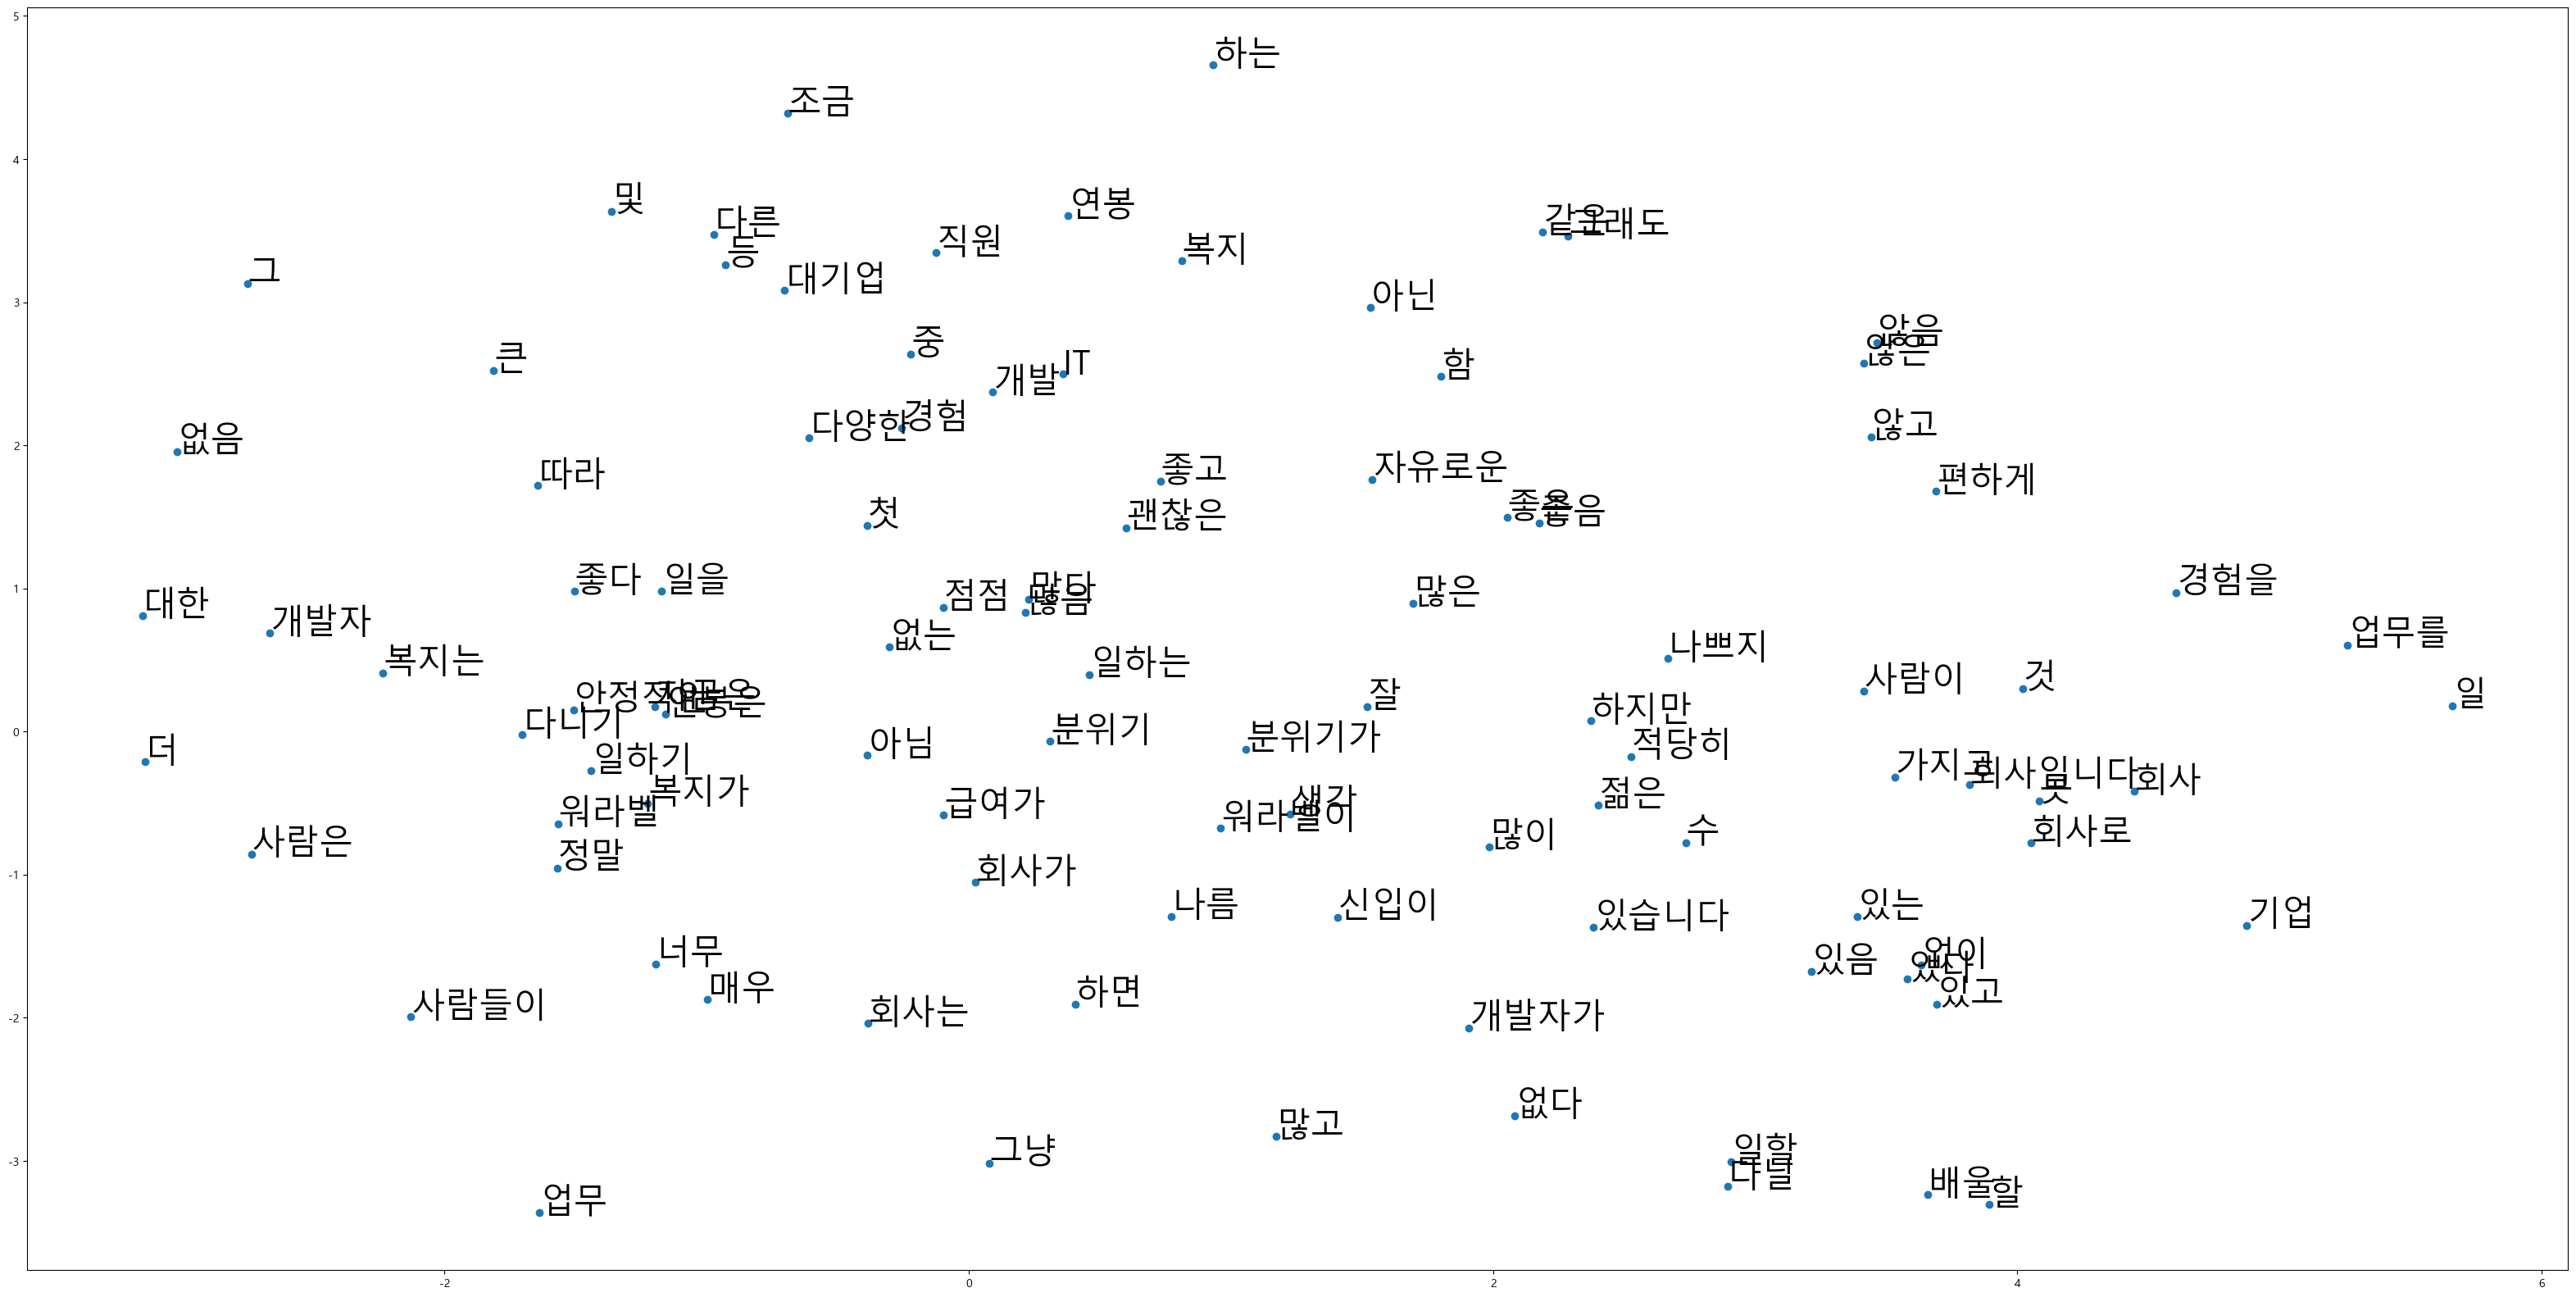

In [384]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

In [385]:
#다른 거
vect = CountVectorizer() 

In [386]:
csv0

,Unnamed: 0,회사,직무,상황,지역,작성일,총점,승진 기회 및 가능성,복지 및 급여,업무와 삶의 균형,사내문화,경영진,총평,장점,단점,바라는점
0,0,페이레터(주),개발,\n 현직원\n,서울,2022. 11,40%,40%,40%,80%,80%,60%,부바부가 심하지만 나름 신입때는 배울게 많은 회사,최소한의 복지는 존재 중소기업보다는 좋은 회사. 수직적이지 않아서 좋습니다 남아있는...,부서가 잘못 걸리면 평생 쓰지 않을 언어를 쓰고 커리어에 도움이 되지 않습니다. 상...,기본 연봉을 올리지 않으면 남아있는 직원들마저 떠날 가능성이 높습니다. 최소한의 복...
1,1,페이레터(주),개발,\n 전직원\n,서울,2022. 10,40%,40%,40%,80%,60%,40%,신입 개발자가 첫 경력 쌓기엔 아주 좋은 곳 하지만 중간 대리급 이상의 ...,처음 입사하면 신입 교육과 프로젝트를 진행하며 이는 실 업무할 시 도움이 됨 연차 ...,팀바팀이지만 업무의 체계가 주먹구구식이다 복지 및 급여가 타 회사에 비해 약한 편 ...,상장에 열을 올리느라 정작 임직원들을 돌아보지 못하는 것 같아요 직원들의 의견에 더...
2,2,페이레터(주),개발,\n 전직원\n,서울,2022. 09,60%,60%,40%,60%,40%,40%,그당시 인턴기간이였지만 개발자 임에도 불구하고 정장을 입고다니는게 비효율...,자기분야를 개발하는데 지원을 조금 해줌 저녁식사 커피 머신기 여름에는 아이스크림 제공해줌,그당시 수직적인 문화이고 연봉도 만족할 수준은 아님 그리고 신입일때 정장을 입어야 했음,수직적인 분위기와 복장규제가 지금은 있는지는 모르겠지만 없어져야할 문화임
3,3,페이레터(주),개발,\n 전직원\n,서울,2022. 08,60%,60%,60%,60%,60%,60%,신입으로 다니기엔 좋다 연차쌓이면 고인물,신입으로 사회생활 처음 시작하기엔 괜찮음 사수 붙여주고 동기가 생겨 재밌따 3개월 ...,최근에 중견기업으로 바꼈다고 들음 중소기업 혜택이 쏠쏠했는데 아쉽,능력없는 고인물들은 정리를 했으면 좋겠다 분위기 악화시는 존재들
4,4,페이레터(주),개발,\n 현직원\n,서울,2022. 08,40%,100%,40%,60%,100%,40%,복지가 계속 줄고 있음많은 사람은 이직하여 나갔고 그 부담은 남아 있는 ...,눈치는 안봄 사람들은 좀 너그러운 분위기놀 수 있는 한량 회사카페를 자주 갈 수 있음,업무 외 시간에 일 하는 것은 당연한 것이라는 분위기야근하면 좋아하고 고객사 응대는...,분위기 변화를 위하려 노력이 필요로 해 보입니다하지만 관심 없는거 알아요
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13235,13235,(주)집토스,영업/제휴,\n 전직원\n,서울,2022. 12,40%,20%,20%,20%,20%,20%,아이티 회사가 맞는지 잘 모르겠는 스타트업,배울 수 있어 좋다 교육 잘 받고 할 수 있음 업무 자유도 높은편,처우 젊은꼰대 주말일 연봉적음 능력없는 사람들 관리직,앞으로 잘 이끌어주세요 많은 믿고 하는 직원들이 많으니
13236,13236,(주)집토스,서비스/고객지원,\n 전직원\n,서울,2022. 12,40%,60%,60%,60%,20%,20%,장점은 처음 일을 시작하는 사람들은 배울 수 있음 영업직에서는 좋은 점이...,연차 눈치 안보고 쓸 수 있음 영업 잘하면 터치하지 않는다,복지제도가 없다고 볼 수 있음 영업 잘하면 터치하지 않지만 은근 자질구레 보여주기식...,절이 싫으면 중이 떠나야하기에 떠났지만 뒤돌아보면 아쉬움이 많은 회사였습니다
13237,13237,(주)집토스,마케팅/시장조사,\n 전직원\n,서울,2022. 11,40%,60%,60%,60%,60%,20%,성공 이후 직원들에게 어떤 베네핏을 제공할지에 대한 명확한 가이드가 없음...,자유로움. 자유로움의 이유는 방향성이 없기 때문에 아무말 대잔치가 가능하다. 특히 ...,방향성이 없고 생존만을 외친다. 생존은 방향성이 있어야 한다. 이전의 USP를 버리...,이 회사를 처음 만들었을 때의 본인들이 생각했던 방향이 맞습니다. 지금 당장의 매출...
13238,13238,(주)집토스,전문직,\n 전직원\n,서울,2022. 11,40%,60%,80%,40%,20%,20%,신입이 기본을 배우고 나가기에 너무 좋은 회사,처음 부동산을 접할 때 기본급을 받으며 일을 할 수 있다. 지바지이지만 사람들끼리 ...,부동산 기업중 가장 좋지 않은 기업이미지를 가지고 있으며. 직원들 관리가 제대로 되...,직원 관리가 제대로 되었으면 좋겠습니다


In [387]:
csv0['총점'] = csv0['총점'].apply(lambda v: v.replace('%','')).astype('float').apply(lambda v:v/20).astype('float')


In [388]:
# csv0[['회사','직무','총점']]
csv_split = csv0[["회사","직무","총점"]]
csv_split

,회사,직무,총점
0,페이레터(주),개발,2.0
1,페이레터(주),개발,2.0
2,페이레터(주),개발,3.0
3,페이레터(주),개발,3.0
4,페이레터(주),개발,2.0
...,...,...,...
13235,(주)집토스,영업/제휴,2.0
13236,(주)집토스,서비스/고객지원,2.0
13237,(주)집토스,마케팅/시장조사,2.0
13238,(주)집토스,전문직,2.0


In [389]:
ratings_matrix = csv_split.pivot_table('총점', index='직무', columns='회사')
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix_T = ratings_matrix.transpose()
ratings_matrix

회사,(유)미소,(주)가온아이,(주)곰앤컴퍼니,(주)그라비티,(주)녹십자헬스케어,(주)농협정보시스템,(주)더크림유니언,(주)디지틀조선일보,(주)레뷰코퍼레이션,(주)마인즈랩,...,한국내쇼날인스트루먼트(주),한국모바일인증(주),한국정보통신(주),한국지역정보개발원,한국통신인터넷기술(주),한빛소프트(주),한솔인티큐브(주),한일네트웍스(주),한진정보통신(주),현대에이치디에스(주)
직무,,,,,,,,,,,,,,,,,,,,,
개발,0.0,2.0,0.0,2.666667,1.5,3.25,3.00,0.000000,0.000000,2.5,...,3.0,1.0,2.5,3.000000,3.4,4.0,3.333333,4.0,3.6,3.666667
교육,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
금융/재무,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.000000
기획/경영,2.0,0.0,2.0,0.000000,1.0,3.00,0.00,2.666667,2.000000,3.0,...,3.0,3.0,0.0,3.333333,0.0,4.0,2.500000,0.0,0.0,4.000000
데이터,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,3.000000,0.000000,1.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
디자인,0.0,0.0,0.0,3.000000,0.0,0.00,2.25,0.000000,0.000000,1.0,...,0.0,0.0,0.0,0.000000,0.0,3.0,0.000000,0.0,0.0,0.000000
마케팅/시장조사,0.0,0.0,2.0,3.000000,0.0,0.00,0.00,0.000000,4.000000,0.0,...,4.0,3.5,0.0,0.000000,0.0,0.0,0.000000,3.0,0.0,0.000000
미디어/홍보,0.0,0.0,2.0,0.000000,0.0,0.00,0.00,4.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
생산/제조,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000


In [390]:
reader = Reader()
data = Dataset.load_from_df(csv_split, reader= reader)
data = DatasetAutoFolds.build_full_trainset(data)

In [391]:
model = SVD()
model.fit(data)

In [392]:
model.compute_similarities()

array([[1.        , 0.        , 0.125     , ..., 0.66666667, 0.        ,
        0.        ],
       [0.        , 1.        , 0.15      , ..., 0.        , 1.        ,
        0.14285714],
       [0.125     , 0.15      , 1.        , ..., 0.13333333, 0.2       ,
        0.13333333],
       ...,
       [0.66666667, 0.        , 0.13333333, ..., 1.        , 0.4       ,
        1.        ],
       [0.        , 1.        , 0.2       , ..., 0.4       , 1.        ,
        0.        ],
       [0.        , 0.14285714, 0.13333333, ..., 1.        , 0.        ,
        1.        ]])

In [393]:
csv_end = pd.DataFrame(model.compute_similarities(), index=csv0["회사"].unique(), columns=csv0["회사"].unique())
csv_end["페이레터(주)"].sort_values(ascending = False)[1:5]

(주)오케이몰        0.714286
(주)예스콜닷컴       0.714286
아이덴티티게임즈(주)    0.714286
에이텍(주)         0.714286
Name: 페이레터(주), dtype: float64

In [394]:
#다른 거

def predict_rating(ratings_arr, item_sim_arr ):
    ratings_pred = ratings_arr.dot(item_sim_arr)/ np.array([np.abs(item_sim_arr).sum(axis=1)])
    return ratings_pred

In [395]:
ratings_pred = predict_rating(ratings_matrix.values , csv_end.values)
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)
print(ratings_pred_matrix.shape)
ratings_pred_matrix.head(3)

(17, 133)


회사,(유)미소,(주)가온아이,(주)곰앤컴퍼니,(주)그라비티,(주)녹십자헬스케어,(주)농협정보시스템,(주)더크림유니언,(주)디지틀조선일보,(주)레뷰코퍼레이션,(주)마인즈랩,...,한국내쇼날인스트루먼트(주),한국모바일인증(주),한국정보통신(주),한국지역정보개발원,한국통신인터넷기술(주),한빛소프트(주),한솔인티큐브(주),한일네트웍스(주),한진정보통신(주),현대에이치디에스(주)
직무,,,,,,,,,,,,,,,,,,,,,
개발,2.285648,2.188407,2.172466,2.216138,2.253214,2.261932,2.334120,2.259325,2.194102,2.267469,...,2.290956,2.277330,2.276801,2.248047,2.316632,2.280532,2.200763,2.248650,2.196180,2.401835
교육,0.021099,0.026245,0.016805,0.036112,0.024335,0.024640,0.012589,0.020530,0.026497,0.029128,...,0.011802,0.019623,0.019436,0.028082,0.013855,0.027915,0.026068,0.018151,0.026102,0.000000
금융/재무,0.070311,0.079391,0.124389,0.121578,0.100395,0.130449,0.051612,0.152957,0.099448,0.106304,...,0.045241,0.076070,0.070108,0.146098,0.079184,0.129606,0.203718,0.076194,0.088944,0.073071


In [396]:
def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

print('아이템 기반 모든 인접 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values ))

def predict_rating_topsim(ratings_arr, item_sim_arr, n=11):
    pred = np.zeros(ratings_arr.shape)

    for col in range(ratings_arr.shape[1]):
        top_n_items = [np.argsort(item_sim_arr[:, col])[:-n-1:-1]]
        for row in range(ratings_arr.shape[0]):
            pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items].T) 
            pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n_items]))        
    return pred

아이템 기반 모든 인접 이웃 MSE:  3.5954300400168457


In [397]:
ratings_pred = predict_rating_topsim(ratings_matrix.values , csv_end.values, n=11)
print('아이템 기반 인접 TOP-11 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values ))
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)

아이템 기반 인접 TOP-11 이웃 MSE:  3.0872208977455227


C:\Users\dlwjd\AppData\Local\Temp\ipykernel_13480\2288791987.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items].T)
C:\Users\dlwjd\AppData\Local\Temp\ipykernel_13480\2288791987.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n_items]))


In [398]:
def get_unseen_movies(ratings_matrix, userId):
    user_rating = ratings_matrix.loc[userId,:]
    already_seen = user_rating[ user_rating > 0].index.tolist()
    movies_list = ratings_matrix.columns.tolist()
    unseen_list = [ movie for movie in movies_list if movie not in already_seen]
    
    return unseen_list

In [399]:
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies
    
    
get_unseen_movies(ratings_matrix, '개발')
unseen_list = get_unseen_movies(ratings_matrix, '개발')
recomm = recomm_movie_by_userid(ratings_pred_matrix, '개발', unseen_list, top_n=10)
recomm = pd.DataFrame(data=recomm.values,index=recomm.index,columns=['pred_score'])
recomm

,pred_score
회사,
(주)키위컴퍼니,2.539885
(주)진학사,2.372058
(유)미소,2.366198
(주)후이즈,2.350000
(주)플립커뮤니케이션즈,2.317684
(주)위민,2.230556
더화이트커뮤니케이션(주),2.224811
아이헤이트플라잉버그스(주),2.176471
(주)디지틀조선일보,2.135647
